In [94]:
from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations

In [95]:
point = np.array([80, 150])

sample_path_l2 = '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_l2.h5'
sample_path_mlda = '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_mlda.h5'
sample_path_ref = '/home/anne/Masterarbeit/masterarbeit/results/samples_2d_rad_ref.h5'

fin = h5py.File(sample_path_l2)
l2_samples = np.array( fin['/samples'][0:2] )
fin.close()

fin = h5py.File(sample_path_mlda)
mlda_samples = np.array( fin['/samples'][0:2] )
fin.close()

fin = h5py.File(sample_path_ref)
ref_samples = np.array( fin['/samples'][0:2] )
fin.close()

path_mesh = "data/mesh_20_3.msh"

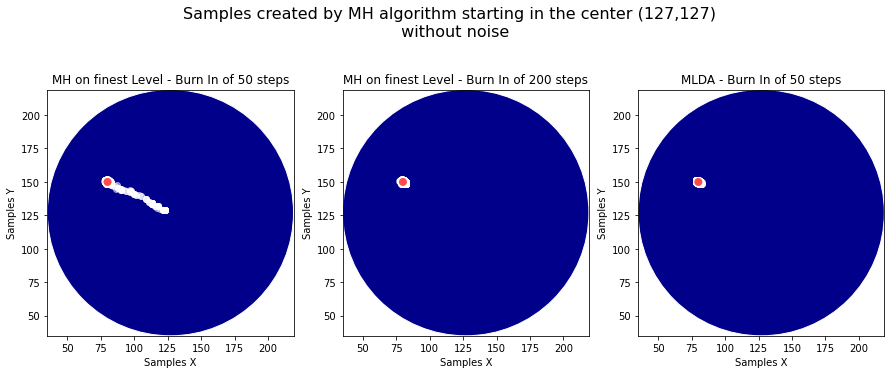

In [96]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
fig.subplots_adjust(wspace=.2)

evaluations.set_ax(ax[0],"darkblue")
ax[0].scatter(l2_samples[0, 50:], l2_samples[1, 50:], c='white', alpha=0.5)
evaluations.draw_point(ax[0],point,0.7)

evaluations.set_ax(ax[1],"darkblue")
ax[1].scatter(l2_samples[0, 200:], l2_samples[1, 200:], c='white', alpha=0.5)
evaluations.draw_point(ax[1],point,0.7)

evaluations.set_ax(ax[2],"darkblue")
ax[2].scatter(mlda_samples[0, 50:], mlda_samples[1, 50:], c='white', alpha=0.5)
evaluations.draw_point(ax[2],point,0.7)

fig.suptitle('Samples created by MH algorithm starting in the center (127,127) \n without noise', fontsize=16)
ax[0].set_title('MH on finest Level - Burn In of 50 steps')
ax[1].set_title('MH on finest Level - Burn In of 200 steps')
ax[2].set_title('MLDA - Burn In of 50 steps')
plt.show()




0.027754763543979242
0.01794024591311891
Level 2:
Mean = [ 80.09083424 149.96817623]
e1 = 0.0962476616478942
e2 = 0.027754763543979242


MLDA:
Mean = [ 80.01824234 149.98716432]
e1 = 0.022305552810854775
e2 = 0.01794024591311891




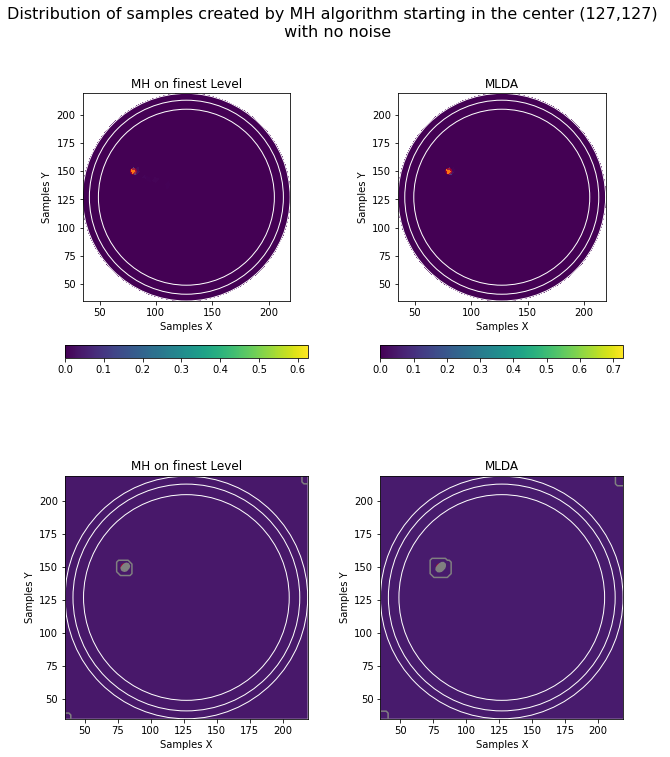

In [97]:
fig, ax = plt.subplots(2, 2, figsize=(10,12))
fig.subplots_adjust(wspace=.3)

im, vmin, vmax = evaluations.draw_cells(path_mesh,l2_samples[:,100:1000],ax[0,0])
evaluations.set_ax(ax[0,0])
evaluations.draw_point(ax[0,0],point,0.5)
plt.colorbar(im, ax=ax[0,0],location="bottom")

evaluations.draw_densities(l2_samples[:,500:2000],ax[1,0])
evaluations.set_ax(ax[1,0])
evaluations.draw_point(ax[1,0],point,0.5)

im, vmin, vmax = evaluations.draw_cells(path_mesh,mlda_samples[:,100:1000],ax[0,1])
evaluations.set_ax(ax[0,1])
evaluations.draw_point(ax[0,1],point,0.5)
plt.colorbar(im, ax=ax[0,1],location="bottom")

evaluations.draw_densities(mlda_samples[:,100:1000],ax[1,1])
evaluations.set_ax(ax[1,1])
evaluations.draw_point(ax[1,1],point,0.5)

fig.suptitle('Distribution of samples created by MH algorithm starting in the center (127,127) \n with no noise', fontsize=16)
ax[0,0].set_title('MH on finest Level')
ax[0,1].set_title('MLDA')
ax[1,0].set_title('MH on finest Level')
ax[1,1].set_title('MLDA')

centers = evaluations.get_midpoints(meshio.read(path_mesh))

bins_ref = evaluations.binning(centers,ref_samples[:,1000:])
bins_l2 = evaluations.binning(centers,l2_samples[:,200:])
bins_mlda = evaluations.binning(centers,mlda_samples[:,50:])

error = np.linalg.norm(bins_ref-bins_l2,2)
print(error)

error = np.linalg.norm(bins_ref-bins_mlda,2)
print(error)

print("Level 2:")
mean = np.mean(l2_samples[:,200:], axis=1)
print("Mean = " + str(mean))
print("e1 = "+ str(np.linalg.norm(mean-point)))
error = np.linalg.norm(bins_ref-bins_l2,2)
print("e2 = " + str(error))
print("\n")

print("MLDA:")
mean = np.mean(mlda_samples[:,50:], axis=1)
print("Mean = " + str(mean))
print("e1 = "+ str(np.linalg.norm(mean-point)))
error = np.linalg.norm(bins_ref-bins_mlda,2)
print("e2 = " + str(error))
print("\n")

In [125]:
samples = l2_samples

tol = 0.01
error = 1

start = 200
end = 1000
step_size = 100
while error > tol and end<len(samples[0]):
    end += step_size
    bins = evaluations.binning(centers,samples[:,start:end])
    error = np.linalg.norm(bins_ref-bins,2)
    print(error)

print(end)





0.06826959630034321
0.04234783869218376
0.04075202491074852
0.048091317470504734
0.059669155796001384
0.03875028180359975
0.044371721242034846
0.04561312918605902
0.029331506145922198
0.027227234694698097
0.02548493483052117
0.02548834573741149
0.024547415210215272
0.019589278871087207
0.015686627359024808
0.019841953130443738
0.01878324951405827
0.019221944343655813
0.019497404179674112
0.022206848191993405
0.02126322543235035
0.024529435040289996
0.02313024603750785
0.025853794363122715
0.023651360527541784
0.02323857748274835
0.024029102166687508
0.027129153901437785
0.023467872315631973
0.02542809498288112
0.025159161205734314
0.028768785398896823
0.027574108169013605
0.02817198589886524
0.02892253608181959
0.026500798114937774
0.02509252339612284
0.026914110433693916
0.028869452364012227
0.027754763543979242
5000
